# Import functions and vars

In [698]:
import pickle
import pandas as pd
import numpy as np

import spacy
nlp = spacy.load('en_core_web_sm')
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import TreebankWordTokenizer, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))
import re
import string
from collections import Counter

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

from sklearn.decomposition import LatentDirichletAllocation

# logging (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict

In [2]:
# #  tfidf vectorized array:
# with open('/Users/Noah/Github_repos/Project_4/text_tfidf2', 'rb') as file:
#     tfidf_array = pickle.load(file)

# #tfidf vectorized frame:
# with open('/Users/Noah/Github_repos/Project_4/tfidf2_df', 'rb') as file:
#     tfidf_df = pickle.load(file)
    
    
# #  tfidf vectorized array - nouns:
# with open('/Users/Noah/Github_repos/Project_4/tfidf_nouns_array', 'rb') as file:
#     tfidf_nouns_array = pickle.load(file)

# #tfidf vectorized frame - nouns:
# with open('/Users/Noah/Github_repos/Project_4/tfidf_nouns_df', 'rb') as file:
#     tfidf_nouns_df = pickle.load(file)

In [3]:
df = pd.read_pickle('data_for_vectorization')

In [4]:
df.head()

,names,texts,tokens,tokens_nouns,token_strings,token_nouns_strings
3,Dawn-of-the-Dead,\nDAWN OF\nTHE DEAD\n(The working draft 1977)\...,"[working, draft, george, romero, face, young, ...","[draft, george, romero, face, woman, credit, w...",working draft george romero face young woman a...,draft george romero face woman credit woman fa...
5,Gremlins-2,\n \n \n ...,"[written, charlie, haas, revised, crowded, chi...","[charlie, haas, street, rand, peltzer, mogwai,...",written charlie haas revised crowded chinatown...,charlie haas street rand peltzer mogwai stair ...
6,Mulholland-Drive,\n\n\n\nMulholland Drive Screenplay\n\n\n\n\t\...,"[mulholland, drive, screenplay, u, l, h, l, l,...","[mulholland, drive, screenplay, l, h, l, r, e,...",mulholland drive screenplay u l h l l n r v e ...,mulholland drive screenplay l h l r e l hl r e...
7,What-Lies-Beneath,\n\n\n WHAT LIES BENEATH\...,"[clark, gregg, june, moving, murky, hazedark, ...","[clark, gregg, june, hazedark, blue, green, sh...",clark gregg june moving murky hazedark blue gr...,clark gregg june hazedark blue green shaft pur...
8,House-of-1000-Corpses,"\n ""HOUSE OF 1...","[written, r, w, zombie, revised, adancing, aro...","[r, w, zombie, movie, monster, frame, barrel, ...",written r w zombie revised adancing around gra...,r w zombie movie monster frame barrel shotgun ...


# tf-idf

In [5]:
text = df.token_strings

tfidf = TfidfVectorizer(ngram_range=(0,1), binary=True, stop_words='english', max_features = 10000) 

tfidf_array = tfidf.fit_transform(text)

tfidf_df = pd.DataFrame(tfidf_array.toarray(), columns=tfidf.get_feature_names())


In [6]:
tfidf_df.head()

,aa,aand,aappears,aat,aback,abandon,abandoned,abdomen,abdominal,abducted,...,yup,zero,zip,zipper,zipping,zippo,zombie,zone,zoo,zoom
0,0.017330,0.000000,0.0,0.0,0.000000,0.022083,0.016291,0.0,0.0,0.000000,...,0.000000,0.021773,0.019867,0.000000,0.0,0.0,0.023818,0.023442,0.0,0.022083
1,0.000000,0.020344,0.0,0.0,0.000000,0.000000,0.016888,0.0,0.0,0.000000,...,0.000000,0.000000,0.020594,0.029228,0.0,0.0,0.000000,0.024301,0.0,0.000000
2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.035675,0.0,0.0,0.000000,0.000000,0.0,0.000000
3,0.020191,0.022865,0.0,0.0,0.025729,0.000000,0.000000,0.0,0.0,0.000000,...,0.032142,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
4,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.017714,0.0,0.0,0.034896,...,0.000000,0.023676,0.000000,0.000000,0.0,0.0,0.025899,0.000000,0.0,0.000000


# Function to return top docs and top words

In [9]:
# Get top docs for each topic
def top_docs(doc_component_df, topic, n_docs):
    return list(doc_component_df
           .sort_values(by = topic, ascending = False)
           .head(n_docs).index.values)

# run on svd_doc_component_df etc


# Get top words for each topic
def top_words(word_component_df, topic, n_words):
    return (word_component_df
           .sort_values(by = topic, ascending = False)
           .head(n_words))[topic].index.values # only want the words themselves

# run on svd_word_component_df etc

# Topic modeling with SVD - 6 topics

Note: including all parts of speech.

------------

Initializing and fitting model:

In [920]:
svd_model = TruncatedSVD(n_components=6, algorithm='randomized', n_iter=100)
svd_matrix = svd_model.fit_transform(tfidf_array)

Explained variance:

In [620]:
print('Cumulative explained variation for 6 principal components: {:.2f}'.format(np.sum(svd_model.explained_variance_ratio_)))

Cumulative explained variation for 6 principal components: 0.07


Checking that our matrix is the right shape (num movies * num topics):

In [621]:
svd_matrix.shape

(125, 6)

In [622]:
svd_doc_topic_df = pd.DataFrame(svd_matrix, index = df.names)

Doc component matrix

In [623]:
svd_doc_topic_df.head()

,0,1,2,3,4,5
names,,,,,,
Dawn-of-the-Dead,0.512809,0.159219,-0.053544,-0.053152,-0.084163,0.122614
Gremlins-2,0.486305,-0.021044,-0.070765,-0.026215,-0.089478,0.195823
Mulholland-Drive,0.479729,-0.154804,-0.084083,-0.088073,0.005648,0.025989
What-Lies-Beneath,0.468937,-0.079340,-0.014410,-0.166649,0.206315,-0.070407
House-of-1000-Corpses,0.507604,-0.130496,-0.118191,0.192248,-0.003434,-0.002086


Word component matrix

In [624]:
svd_word_topic_df = pd.DataFrame(svd_model.components_, columns = tfidf_df.columns).transpose()

In [625]:
svd_word_topic_df.head()

,0,1,2,3,4,5
aa,0.014146,0.013083,-0.013660,-0.002519,0.013810,-0.008334
aand,0.012129,0.002453,0.001211,-0.017915,0.030039,-0.000126
aappears,0.005737,0.002413,-0.016481,0.003586,0.021396,-0.012579
aat,0.006747,-0.000398,-0.001142,0.005909,0.003857,-0.022516
aback,0.010570,-0.017913,0.005804,0.001842,0.017399,-0.015817


Top doc in each topic:

In [626]:
top_docs(svd_doc_topic_df, 0, 10)

['Silence-of-the-Lambs',
 'Jaws',
 'Frankenstein',
 'It',
 'Jurassic-Park-The-Lost-World',
 'Pet-Sematary-II',
 'Prophecy,-The',
 'Constantine',
 'Blade',
 'Hellboy']

Top word in each topic:

In [627]:
top_words(svd_word_topic_df, 0, 10)

array(['neck', 'hit', 'hang', 'happened', 'throw', 'read', 'forward',
       'getting', 'wait', 'ground'], dtype=object)

# Top words and docs in each topic

In [628]:
for i in svd_word_topic_df.columns:
    print('\nTopic:{}\n'.format(i))
    print('top words: {}'.format(top_words(svd_word_topic_df, i, 30)))
    print('top docs: {}'.format(top_docs(svd_doc_topic_df, i, 20)))
    print('--'*30)


Topic:0

top words: ['neck' 'hit' 'hang' 'happened' 'throw' 'read' 'forward' 'getting' 'wait'
 'ground' 'chair' 'leg' 'follows' 'stay' 'line' 'wrong' 'lot' 'notice'
 'tell' 'mean' 'need' 'sure' 'bed' 'scream' 'moving' 'drop' 'got' 'better'
 'talking' 'check']
top docs: ['Silence-of-the-Lambs', 'Jaws', 'Frankenstein', 'It', 'Jurassic-Park-The-Lost-World', 'Pet-Sematary-II', 'Prophecy,-The', 'Constantine', 'Blade', 'Hellboy', 'Gothika', 'Jurassic-Park', 'Final-Destination-2', 'Orphan', 'Friday-the-13th-Part-VIII-Jason-Takes-Manhattan', "Jennifer's-Body", 'Nightmare-on-Elm-Street,-A', 'Legion', 'Stir-of-Echoes', 'Suspect-Zero']
------------------------------------------------------------

Topic:1

top words: ['sci' 'fi' 'seal' 'cargo' 'vertical' 'hull' 'orbit' 'generator'
 'machinery' 'laser' 'pilot' 'cockpit' 'skeleton' 'firing' 'tech' 'gauge'
 'hatch' 'military' 'substance' 'data' 'shifting' 'chamber' 'outer'
 'sealing' 'sensor' 'grid' 'descent' 'lever' 'spark' 'probe']
top docs: ['Ali

# Topic interpretation

Possible topics:  
0: home invasion (Scream, Fright Night, When a Stranger Calls), torture (Get out, Saw), Trapped in a location as theme (Saw, A Quiet Place, Get out)  
1: sci-fi/space  
2: vampires/classic horror  
3: people getting eaten by monsters or other people/gore/camp  
4: possessed/haunted location? "room, room, door, window, bed, floor"  
5: character horror

some clear topics like 1 and 2; other topics not clear
Possible issue: combined bi-grams for topic 4. Suggests issue with the script...could go back and look

# Word cloud for each topic

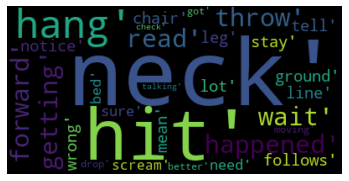

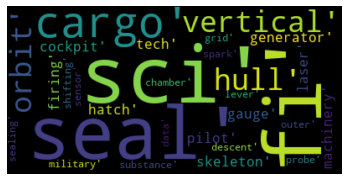

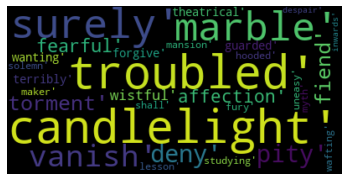

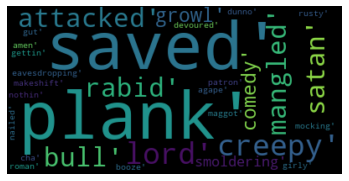

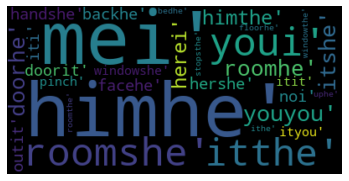

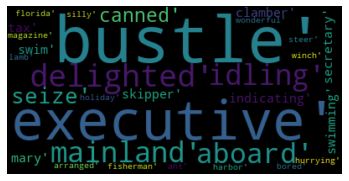

In [927]:
for i in svd_word_topic_df.columns:
#     print('\nTopic:{}\n'.format(i))
    wordcloud = WordCloud().generate(str(top_words(svd_word_topic_df, i, 30)))
    # Display the generated image:
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
#     print('\nTopic:{}\n'.format(i))
    
    file_name = 'Topic_{}_wordcloud'.format(i)
#     print(file_name)
    plt.savefig(file_name)

# K means clustering on SVD

In [742]:
inertias = []

for k_ in np.arange(1, 20):
    km = KMeans(n_clusters=k_)
    km.fit(svd_matrix) # could fit svd_matrix or nmf_matrix here
    inertias.append(km.inertia_)

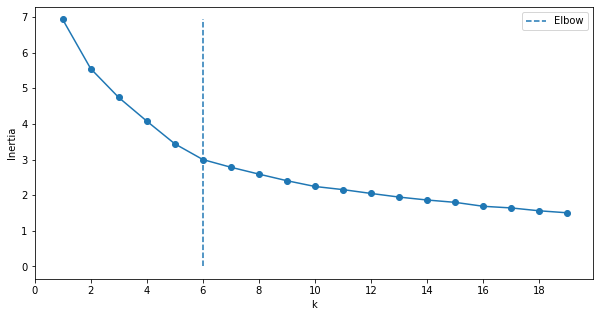

In [743]:
plt.figure(figsize=[10,5])
plt.plot(np.arange(1, 20), inertias, marker='o')
plt.vlines(x=6, ymin=0, ymax=max(inertias), ls='--', label='Elbow')
plt.ylabel("Inertia")
plt.xlabel('k')
plt.xticks(np.arange(0, 20, step=2))
plt.legend();

Let's do 6-means with k=6

In [761]:
num_clusters = 6

km = KMeans(n_clusters = num_clusters)
km_svd = km.fit(svd_matrix)

Where are the cluster centers (remember, they have 6 dimensions)

In [762]:
km_svd.cluster_centers_

array([[ 0.49796594, -0.08925889, -0.00553127, -0.03645571, -0.07078281,
        -0.0688791 ],
       [ 0.50922923,  0.03997489,  0.17291889,  0.06265749,  0.0323626 ,
        -0.02956182],
       [ 0.50531228,  0.17655693, -0.04485739, -0.03787145, -0.02430236,
         0.01044846],
       [ 0.50158399, -0.09366792,  0.03737045, -0.03247946, -0.02863364,
         0.15198211],
       [ 0.50334344, -0.0296167 , -0.07295617,  0.12172034,  0.01251087,
        -0.00324386],
       [ 0.47120487, -0.04706946, -0.06181176, -0.1096547 ,  0.19050379,
        -0.04217965]])

6 svd topics, 6 clusters

Which movie goes into which cluster?

In [763]:
movie_cluster_assignments = km_svd.predict(svd_matrix)

Add to svd df

In [764]:
svd_doc_topic_df

,0,1,2,3,4,5,cluster
names,,,,,,,
Dawn-of-the-Dead,0.512809,0.159219,-0.053544,-0.053152,-0.084163,0.122614,1
Gremlins-2,0.486305,-0.021044,-0.070765,-0.026215,-0.089478,0.195823,5
Mulholland-Drive,0.479729,-0.154804,-0.084083,-0.088073,0.005648,0.025989,3
What-Lies-Beneath,0.468937,-0.079340,-0.014410,-0.166649,0.206315,-0.070407,0
House-of-1000-Corpses,0.507604,-0.130496,-0.118191,0.192248,-0.003434,-0.002086,4
...,...,...,...,...,...,...,...
Alien-3,0.476021,0.169614,0.021742,-0.045594,0.130046,-0.047773,1
"Thing,-The",0.513437,0.161796,-0.075429,0.053584,-0.008250,-0.002202,1
Suspect-Zero,0.523251,-0.063937,-0.015276,-0.018893,-0.110856,0.000691,3


In [765]:
svd_doc_topic_df['cluster'] = movie_cluster_assignments

svd_doc_topic_df.head()

,0,1,2,3,4,5,cluster
names,,,,,,,
Dawn-of-the-Dead,0.512809,0.159219,-0.053544,-0.053152,-0.084163,0.122614,2
Gremlins-2,0.486305,-0.021044,-0.070765,-0.026215,-0.089478,0.195823,3
Mulholland-Drive,0.479729,-0.154804,-0.084083,-0.088073,0.005648,0.025989,0
What-Lies-Beneath,0.468937,-0.079340,-0.014410,-0.166649,0.206315,-0.070407,5
House-of-1000-Corpses,0.507604,-0.130496,-0.118191,0.192248,-0.003434,-0.002086,4


In [766]:
cluster_centers_df = pd.DataFrame(km_svd.cluster_centers_, index = ['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5'])

# Which movie is the closest to each cluster center?

In [916]:
# sample for cluster 0

cluster = 'cluster_0'

clus_vec = cluster_centers_df.loc[cluster].values.reshape(1,-1)
# print(clus_vec)

cluster_mask = svd_doc_topic_df['cluster'] == int(cluster[-1])

doc_mat = svd_doc_topic_df.loc[cluster_mask, [0,1,2,3,4,5]]
# print(doc_mat)

cos_sim = cosine_similarity(clus_vec,doc_mat)
# print(cos_sim)
# print(np.argmax(cos_sim)) # argmax returns the position of the max

svd_doc_topic_df.loc[cluster_mask]

top_movie = svd_doc_topic_df.loc[cluster_mask].index[np.argmax(cos_sim)]

top_movie

'Final-Destination'

In [922]:
for cluster in cluster_centers_df.index:
#     print(cluster)
#     print(cluster[-1])
    
    clus_vec = cluster_centers_df.loc[cluster].values.reshape(1,-1)
    
    cluster_mask = svd_doc_topic_df['cluster'] == int(cluster[-1])
    
    doc_mat = svd_doc_topic_df.loc[cluster_mask, [0,1,2,3,4,5]]
    
    cos_sim = cosine_similarity(clus_vec,doc_mat)

    svd_doc_topic_df.loc[cluster_mask]

    top_movie = svd_doc_topic_df.loc[cluster_mask].index[np.argmax(cos_sim)]

#     print(top_movie)
    
    print('{} most similar movie: {}\n'.format(cluster,top_movie))

cluster_0 most similar movie: Final-Destination

cluster_1 most similar movie: Nightbreed

cluster_2 most similar movie: Alien-Resurrection

cluster_3 most similar movie: Birds,-The

cluster_4 most similar movie: Ginger-Snaps

cluster_5 most similar movie: What-Lies-Beneath



# Visualize 6D topic modeling on tSNE 2 component plot. Colors = cluster assignment.

In [794]:
tsne = TSNE(n_components=2, learning_rate=10, perplexity=10, n_iter = 1000).fit_transform(svd_matrix)
x = [i[0] for i in tsne]
y = [i[1] for i in tsne]

Getting components of tSNE into df with movies.

In [795]:
tsne_doc_component_df = pd.DataFrame(tsne, index = df.names, columns = ['tSNE_c1', 'tSNE_c2'])

# tsne_doc_component_df.head()

Adding movie cluster assignment.

In [796]:
tsne_doc_component_df['cluster'] = movie_cluster_assignments

# tsne_doc_component_df.head()

Plotting.

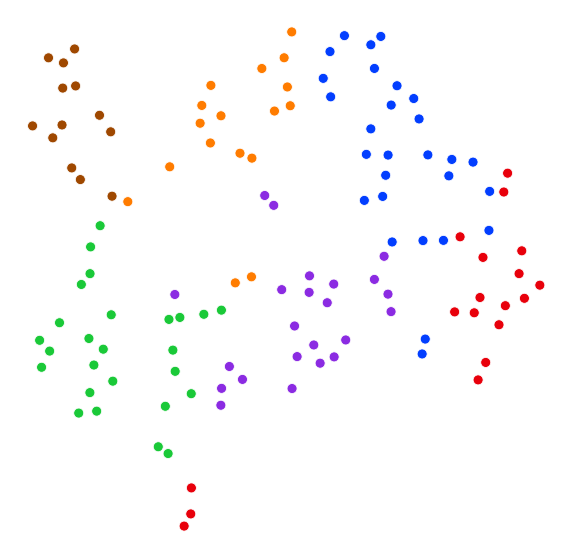

In [946]:
plt.figure(figsize = [10, 10])
sns.scatterplot(tsne_doc_component_df['tSNE_c1'],tsne_doc_component_df['tSNE_c2'], hue = tsne_doc_component_df['cluster'], palette='bright', s=100, legend=False)
# plt.xlabel('tSNE_c1',size=15)
# plt.xlabel('tSNE_c2',size=15);
plt.axis('off');
plt.savefig('tSNE.png', transparent=True)

Plotting with movie names

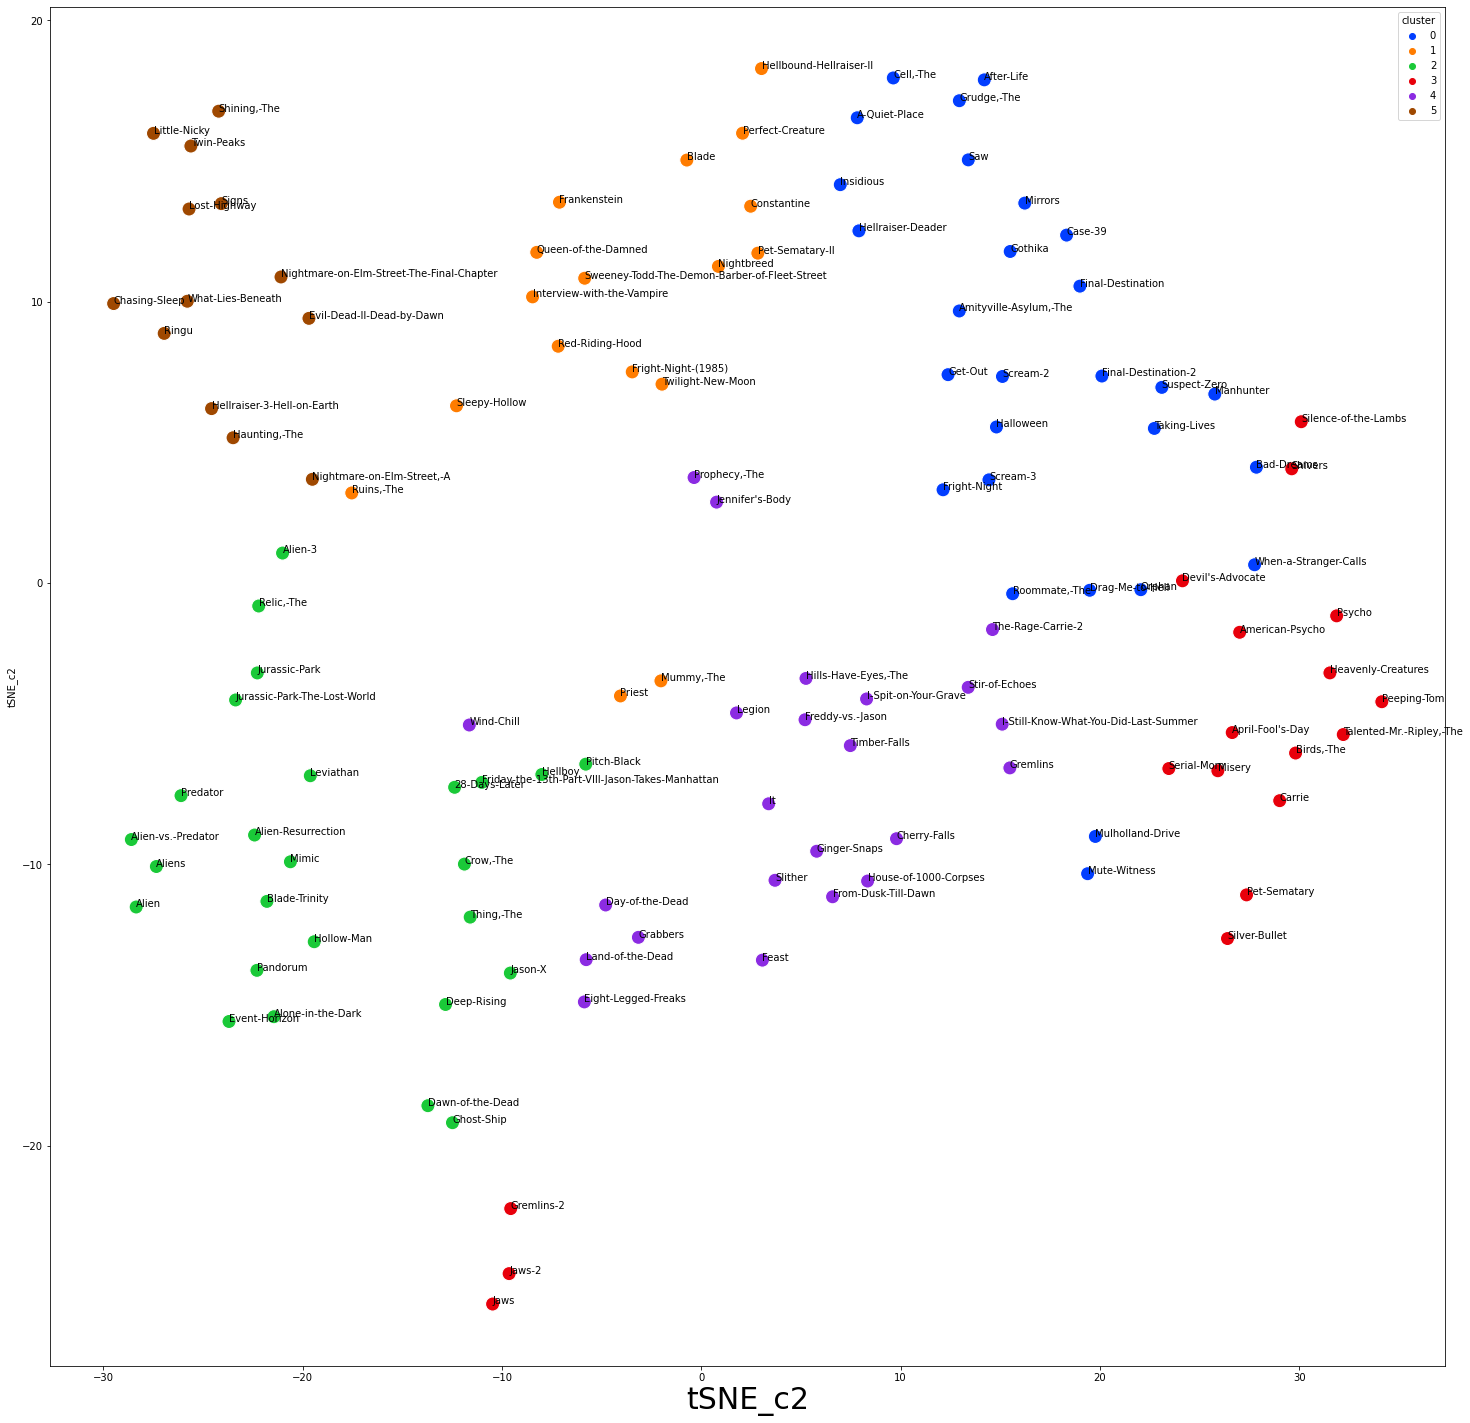

In [939]:
plt.figure(figsize = [25, 25])
sns.scatterplot(tsne_doc_component_df['tSNE_c1'],tsne_doc_component_df['tSNE_c2'], hue = tsne_doc_component_df['cluster'], palette='bright', s=200)
plt.xlabel('tSNE_c1',size=30)
plt.xlabel('tSNE_c2',size=30);

# plt.savefig('tSNE.png', transparent=True)

for i in range(tsne_doc_component_df.shape[0]):
    plt.text(tsne_doc_component_df.iloc[i,0], tsne_doc_component_df.iloc[i,1], str(tsne_doc_component_df.index[i]), size = 10);

# END

# ------------------------------------------------------------------------------------------

In [416]:
lda_doc_topic_df = pd.DataFrame(lda_matrix, index = df.names)
lda_word_topic_df = pd.DataFrame(lda_model.components_, columns = tfidf_df.columns).transpose()

In [417]:
top_docs(lda_doc_topic_df, 2, 10)


['Shining,-The',
 'Mute-Witness',
 'Chasing-Sleep',
 'Signs',
 'Ringu',
 'Gremlins',
 'A-Quiet-Place',
 'Evil-Dead-II-Dead-by-Dawn',
 'Amityville-Asylum,-The',
 'Mulholland-Drive']

In [418]:
top_words(lda_word_topic_df, 0, 10)



array(['doi', 'reallyi', 'itif', 'windowshe', 'gthe', 'superimposed',
       'dislocated', 'lloyd', 'siri', 'iton'], dtype=object)

In [419]:
for i in lda_word_topic_df.columns:

    print('\nTopic:{}\n'.format(i))
    print('top words: {}'.format(top_words(lda_word_topic_df, i, 30)))
    print('top docs: {}'.format(top_docs(lda_doc_topic_df, i, 20)))
    print('--'*30)


Topic:0

top words: ['doi' 'reallyi' 'itif' 'windowshe' 'gthe' 'superimposed' 'dislocated'
 'lloyd' 'siri' 'iton' 'cam' 'diary' 'feetthe' 'introduced' 'knowmaybe'
 'dean' 'himthen' 'indifference' 'placehe' 'forum' 'himselfhe' 'empathy'
 'clog' 'latethe' 'arcane' 'lasting' 'itthis' 'rarely' 'orgasm' 'herhis']
top docs: ['Shining,-The', 'Mute-Witness', 'Chasing-Sleep', 'Signs', 'Ringu', 'Gremlins', 'A-Quiet-Place', 'Evil-Dead-II-Dead-by-Dawn', 'Amityville-Asylum,-The', 'Mulholland-Drive', 'Little-Nicky', 'After-Life', 'Grudge,-The', 'Peeping-Tom', 'Cherry-Falls', 'When-a-Stranger-Calls', 'Get-Out', 'Hills-Have-Eyes,-The', 'Twin-Peaks', 'Scream-3']
------------------------------------------------------------

Topic:1

top words: ['doi' 'reallyi' 'itif' 'windowshe' 'gthe' 'superimposed' 'dislocated'
 'lloyd' 'siri' 'iton' 'cam' 'diary' 'feetthe' 'introduced' 'knowmaybe'
 'dean' 'himthen' 'indifference' 'placehe' 'forum' 'himselfhe' 'empathy'
 'clog' 'latethe' 'arcane' 'lasting' 'itthis' '

# Corex

In [187]:
# !pip install corextopic
# !pip install networkx

In [188]:
from corextopic import corextopic as ct
from corextopic import vis_topic as vt

In [ ]:
# vectorizer = CountVectorizer(max_features=20000,
#                              stop_words='english', token_pattern="\\b[a-z][a-z]+\\b",
#                              binary=True)

# doc_word = vectorizer.fit_transform(df.data)
# words = list(np.asarray(vectorizer.get_feature_names()))

In [192]:
doc_word = tfidf_array
words = list(np.asarray(tfidf.get_feature_names()))

In [197]:
len(words)

10000

In [496]:
topic_model = ct.Corex(n_hidden=6, words=words, seed=1)
topic_model.fit(doc_word, words=words, docs=df.texts)
topic_model.tc # sum of scores for all topics

0.12073092977005394

In [497]:
topic_model.tcs

array([ 4.63029298e-02,  4.27208452e-02,  3.17700550e-02,  4.16206727e-04,
       -5.29041535e-05, -4.26202924e-04])

Topics

In [499]:
topic_model.get_topics(topic=0, n_words=10)

[('aand', 0.0),
 ('preoccupied', 0.0),
 ('precision', -0.0),
 ('precipice', 0.0),
 ('prayer', 0.0),
 ('praise', 0.0),
 ('powerfully', 0.0),
 ('pours', 0.0),
 ('pour', -0.0),
 ('potential', 0.0)]

In [207]:
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: aa,protective,protector,protesting,protocol,proud,proudly,prove,proven,provide
1: aat,pristine,probe,probing,proceeding,proceeds,process,procession,production,professor
2: sensor,aand,possession,possible,postcard,potato,potential,pouch,pounding,powder


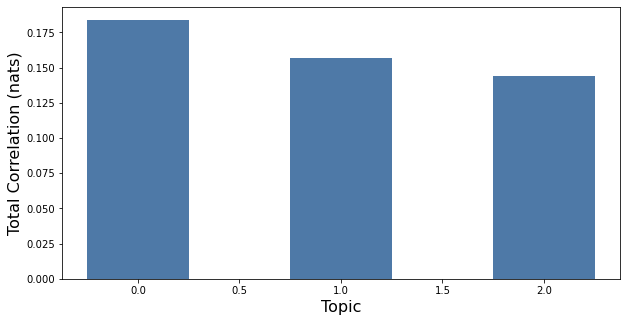

In [208]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

Anchor these three topics?